In [0]:
from google.colab import files


In [0]:
files.upload()

Saving AAPL2.csv to AAPL2.csv


{'AAPL2.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2014-05-27,87.982857,89.408569,87.947144,89.375717,81.915039,87216500\n2014-05-28,89.431427,89.975716,89.111427,89.144287,81.702927,78870400\n2014-05-29,89.692856,90.981430,89.681427,90.768570,83.191628,94118500\n2014-05-30,91.139999,92.024284,89.842857,90.428574,82.880005,141005200\n2014-06-02,90.565712,90.690002,88.928574,89.807144,82.310455,92337700\n2014-06-03,89.779999,91.248573,89.750000,91.077141,83.474419,73177300\n2014-06-04,91.062859,92.555717,90.872856,92.117142,84.427620,83870500\n2014-06-05,92.314285,92.767143,91.801430,92.478569,84.758873,75951400\n2014-06-06,92.842857,93.037140,92.067146,92.224289,84.525826,87484600\n2014-06-09,92.699997,93.879997,91.750000,93.699997,85.878342,75415000\n2014-06-10,94.730003,95.050003,93.570000,94.250000,86.382439,62777000\n2014-06-11,94.129997,94.760002,93.470001,93.860001,86.024994,45681000\n2014-06-12,94.040001,94.120003,91.900002,92.290001,84.586044,54749000\n2014-06-13,92.199

In [0]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('F2.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-27,16.09,16.200001,16.049999,16.160000,12.439670,21034700
1,2014-05-28,16.17,16.360001,16.150000,16.309999,12.555136,23241400
2,2014-05-29,16.40,16.559999,16.370001,16.540001,12.732187,42832500
3,2014-05-30,16.40,16.540001,16.370001,16.440001,12.655210,23065400
4,2014-06-02,16.51,16.510000,16.379999,16.440001,12.655210,17975100


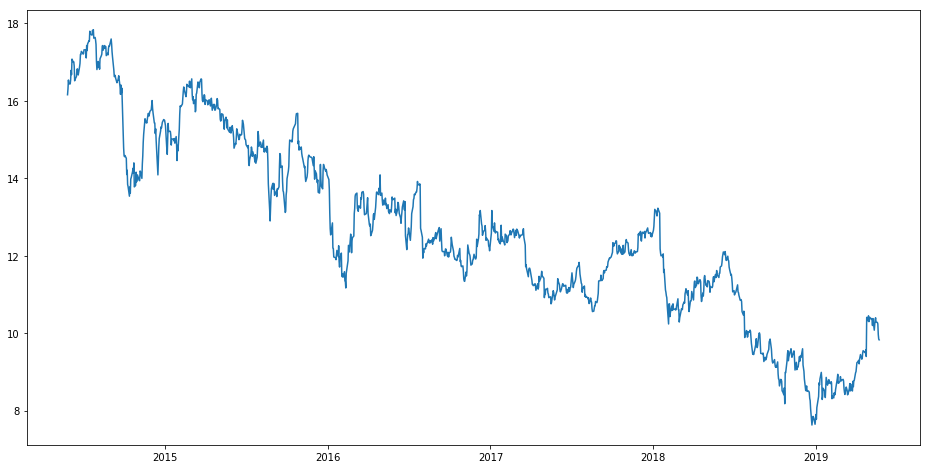

In [0]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [0]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting values using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 67s - loss: 0.0034


In [0]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

0.29467475915355335

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


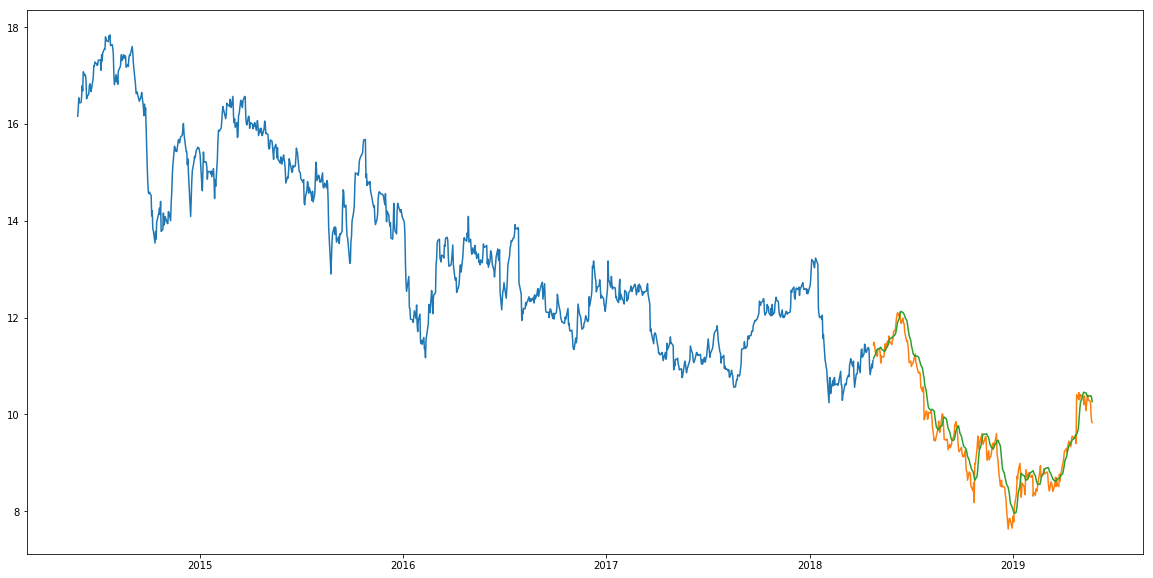

In [0]:
#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [0]:
import datetime
from datetime import timedelta

now = datetime.datetime.now()

#print (valid.loc[valid.index.to_pydatetime() == now.strftime("%Y-%m-%d")])
#print(valid.loc['2019-05-24'])

In [0]:
cdif = valid.loc['2019-05-24'].Close-valid.loc['2019-05-23'].Close
pdif = valid.loc['2019-05-24'].Predictions-valid.loc['2019-05-23'].Predictions
den = valid.loc['2019-05-23'].Close
print (cdif)
print (pdif)

-0.019999999999999574
-0.07254791


In [0]:
#cdif = valid.loc[valid.index.to_pydatetime() == (datetime.datetime.now() - timedelta(days=1))].Close - valid.loc[valid.index.to_pydatetime() == (datetime.datetime.now() - timedelta(days=2))].Close
#pdif = valid.loc['2019-05-24'].Predictions-valid.loc['2019-05-23'].Predictions
#print (cdif)
#print (pdif)

In [0]:
print (pdif/den)

-0.007365270314482869
